# 2. Exploring data regarding NHL games

The is a very interesting dataset regarding [NHL game data](https://www.kaggle.com/martinellis/nhl-game-data) with a lot of amazing details. This data is unfortunately too big to store it together with this notebook in 
Github.
---
**To be able to execute this notebook, please download your own local version of the data from https://www.kaggle.com/martinellis/nhl-game-data and store it into the folder "data/nhl/nhl_stats/"**

---

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image

sns.set()

### Dataset structure

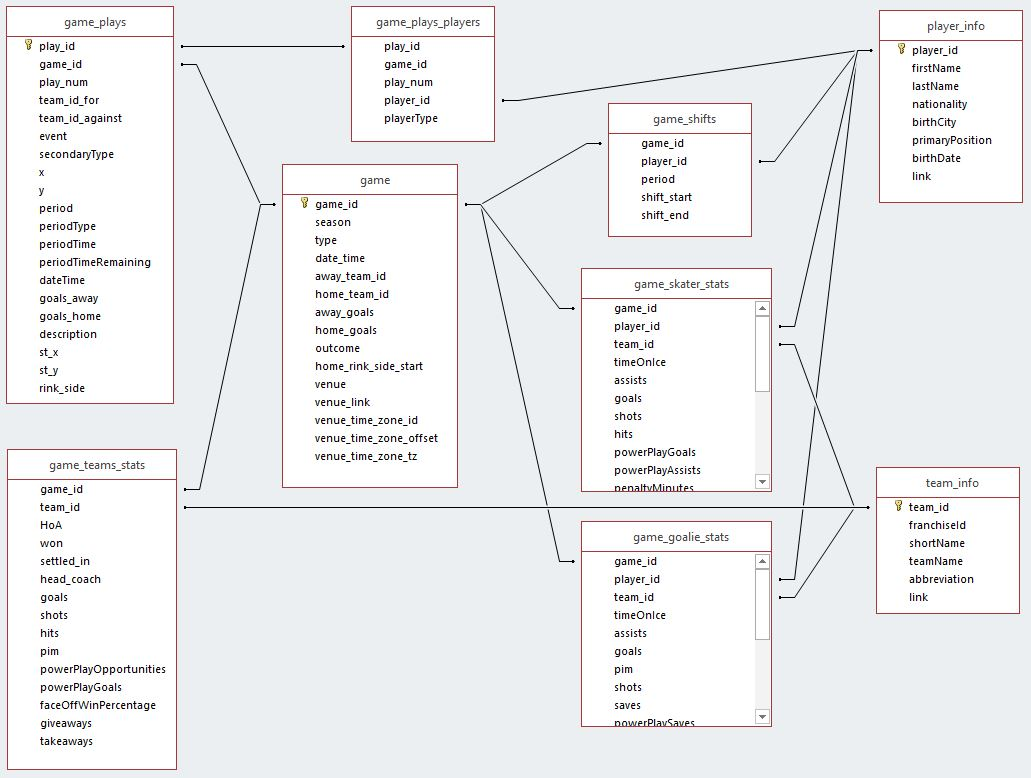

In [2]:
Image(filename='data/images/table_relationships.JPG', width=800)

### Reading and exploring data about skating players in the statististics

In [3]:
df = pd.read_csv('data/nhl/nhl_stats/game_skater_stats.csv')
df.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2016020045,8468513,4,955,1,0,0,2.0,0,0,...,0,1.0,1.0,0,0,1.0,1,858,97,0
1,2016020045,8476906,4,1396,1,0,4,2.0,0,0,...,0,1.0,2.0,0,0,2.0,0,1177,0,219
2,2016020045,8474668,4,915,0,0,1,1.0,0,0,...,0,2.0,0.0,0,0,0.0,-1,805,0,110
3,2016020045,8473512,4,1367,3,0,0,0.0,0,2,...,27,0.0,0.0,0,0,0.0,-1,1083,19,265
4,2016020045,8471762,4,676,0,0,3,2.0,0,0,...,0,0.0,1.0,0,0,0.0,-1,613,63,0


In [4]:
df.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce'],
      dtype='object')

---
Reading data about players. This data contains similar fields for each player like the [salaries dataset](https://www.kaggle.com/camnugent/predict-nhl-player-salaries). Possible merge later if needed.

In [5]:
df = pd.read_csv('data/nhl/nhl_stats/player_info.csv')
df.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_id           3925 non-null   int64  
 1   firstName           3925 non-null   object 
 2   lastName            3925 non-null   object 
 3   nationality         3917 non-null   object 
 4   birthCity           3920 non-null   object 
 5   primaryPosition     3925 non-null   object 
 6   birthDate           3925 non-null   object 
 7   birthStateProvince  2802 non-null   object 
 8   height              3922 non-null   object 
 9   height_cm           3922 non-null   float64
 10  weight              3922 non-null   float64
 11  shootsCatches       3908 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 368.1+ KB


In [7]:
df['birthDateDate']= pd.to_datetime(df['birthDate'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   player_id           3925 non-null   int64         
 1   firstName           3925 non-null   object        
 2   lastName            3925 non-null   object        
 3   nationality         3917 non-null   object        
 4   birthCity           3920 non-null   object        
 5   primaryPosition     3925 non-null   object        
 6   birthDate           3925 non-null   object        
 7   birthStateProvince  2802 non-null   object        
 8   height              3922 non-null   object        
 9   height_cm           3922 non-null   float64       
 10  weight              3922 non-null   float64       
 11  shootsCatches       3908 non-null   object        
 12  birthDateDate       3925 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), obje

---
Now let's have a quick look at the game if there is something worth to be mentioned

In [9]:
df = pd.read_csv('data/nhl/nhl_stats/game.csv')
df.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT


In [10]:
df = pd.read_csv('data/nhl/nhl_stats/game_plays.csv')
df.head()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
0,2016020045_1,2016020045,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-18 23:40:58,0,0,Game Scheduled,NaN,NaN
1,2016020045_2,2016020045,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:35:28,0,0,Period Ready,NaN,NaN
2,2016020045_3,2016020045,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Period Start,NaN,NaN
3,2016020045_4,2016020045,16.0,4.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Jonathan Toews faceoff won against Claude Giroux,0.0,0.0
4,2016020045_5,2016020045,16.0,4.0,Shot,Wrist Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0


In [11]:
df.shape

(5050529, 18)

This is a very interesting table we can extract a lot of details from. There are more than 5 million entries describing the progress of several NHL games. How many *events* per game do we have in average (median):

In [12]:
# how many 'events' per game?
df.groupby('game_id').size().median()

276.0

Besides others, there is a very interesting insight in the data regarding the shots on goal. One can figure out, what shots were made, broken down by the type of the shot and the location. This is very interesting. We also can see if the shot lead to a goal. One could immediately try to figure out, what is the probability of the goal based on the position (and possibly some other parameters). This is something I could approach later. Let's have a closer look at the shots data first.

Focusing to goals first.

In [13]:
df_goals = df[df.event=='Goal'][['x', 'y', 'secondaryType']]
df_goals.dropna()

,x,y,secondaryType
5,-88.0,5.0,Wrap-around
96,-76.0,1.0,Backhand
102,-67.0,-28.0,Slap Shot
139,83.0,-11.0,Backhand
196,-76.0,-11.0,Wrist Shot
...,...,...,...
5050308,-71.0,-3.0,Tip-In
5050327,-74.0,1.0,Backhand
5050484,-67.0,3.0,Snap Shot
5050504,-77.0,7.0,Snap Shot


Interesting to see what types of shot leads to a goal

In [14]:
df_goals.secondaryType.value_counts()

Wrist Shot     45249
Snap Shot      13096
Slap Shot       9835
Backhand        9523
Tip-In          8014
Deflected       2681
Wrap-around      656
Name: secondaryType, dtype: int64

*Wrist shot* is apparently a good way to make a goal. I'll investigate it much closer later in this project.

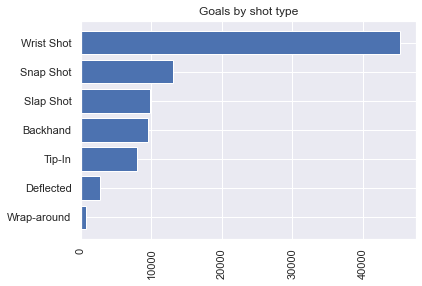

In [15]:
df_goal_counts = df_goals.secondaryType.value_counts()[:20].reset_index().rename(columns={'secondaryType':'cnt', 'index':'type'}).sort_values('cnt')

plt.barh(df_goal_counts.type, df_goal_counts.cnt);
plt.xticks(rotation=90);
plt.title('Goals by shot type');

### And now, let's visualize these shots and their locations on a real ice hockey rink.

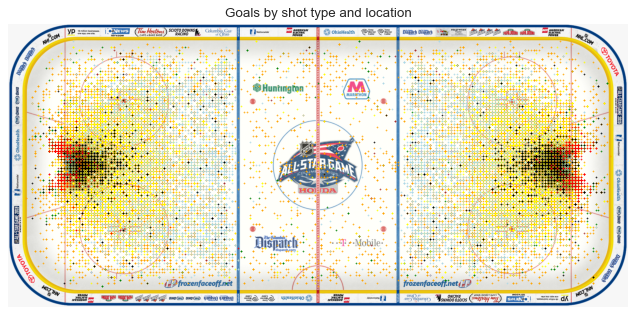

In [16]:
# example of slap shot locations
plt.figure(figsize=(10, 6), dpi=80)
img=plt.imread('data/images/rink_allstars.png')
plt.grid()
plt.axis("off")
plt.imshow(img, extent=[-105, 105, -48, 48])
#plt.scatter(df_goals.x, df_goals.y, s=.2, c='green');
plt.scatter(df_goals[df_goals.secondaryType=='Backhand'].x, df_goals[df_goals.secondaryType=='Backhand'].y, s=.2, c='green');
plt.scatter(df_goals[df_goals.secondaryType=='Tip-In'].x, df_goals[df_goals.secondaryType=='Tip-In'].y, s=.2, c='brown');
plt.scatter(df_goals[df_goals.secondaryType=='Wrist Shot'].x, df_goals[df_goals.secondaryType=='Wrist Shot'].y, s=.2, c='orange');
plt.scatter(df_goals[df_goals.secondaryType=='Snap Shot'].x, df_goals[df_goals.secondaryType=='Snap Shot'].y, s=.2, c='yellow');
plt.scatter(df_goals[df_goals.secondaryType=='Slap Shot'].x, df_goals[df_goals.secondaryType=='Slap Shot'].y, s=.2, c='lightblue');
plt.scatter(df_goals[df_goals.secondaryType=='Deflected'].x, df_goals[df_goals.secondaryType=='Deflected'].y, s=.2, c='black');
plt.scatter(df_goals[df_goals.secondaryType=='Wrap-around'].x, df_goals[df_goals.secondaryType=='Wrap-around'].y, s=.2, c='red');
plt.title('Goals by shot type and location');

---
Let's see the time frame of the dataset:

In [17]:
df = pd.read_csv('data/nhl/nhl_stats/game.csv')
df.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT


In [18]:
print(f'Games documented from {df.date_time_GMT.min()} to {df.date_time_GMT.max()}!')

Games documented from 2000-10-04T23:00:00Z to 2020-09-29T00:00:00Z!


In [19]:
df = pd.read_csv('data/nhl/nhl_stats/team_info.csv')
df.head(15)

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26
3,14,31,Tampa Bay,Lightning,TBL,/api/v1/teams/14
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6
5,3,10,NY Rangers,Rangers,NYR,/api/v1/teams/3
6,5,17,Pittsburgh,Penguins,PIT,/api/v1/teams/5
7,17,12,Detroit,Red Wings,DET,/api/v1/teams/17
8,28,29,San Jose,Sharks,SJS,/api/v1/teams/28
9,18,34,Nashville,Predators,NSH,/api/v1/teams/18


### Checking random sample:

Based on the data, there was a game (id=2016020045) on date_time_GMT=2016-10-19 between teams home_team_id=16 (Chicago Blackhawks) and away_team_id=4 (Philadelphia Flyers), with the result home_goals=7 and away_goals=4.

---

This is really true. There was a game like this according to Google:

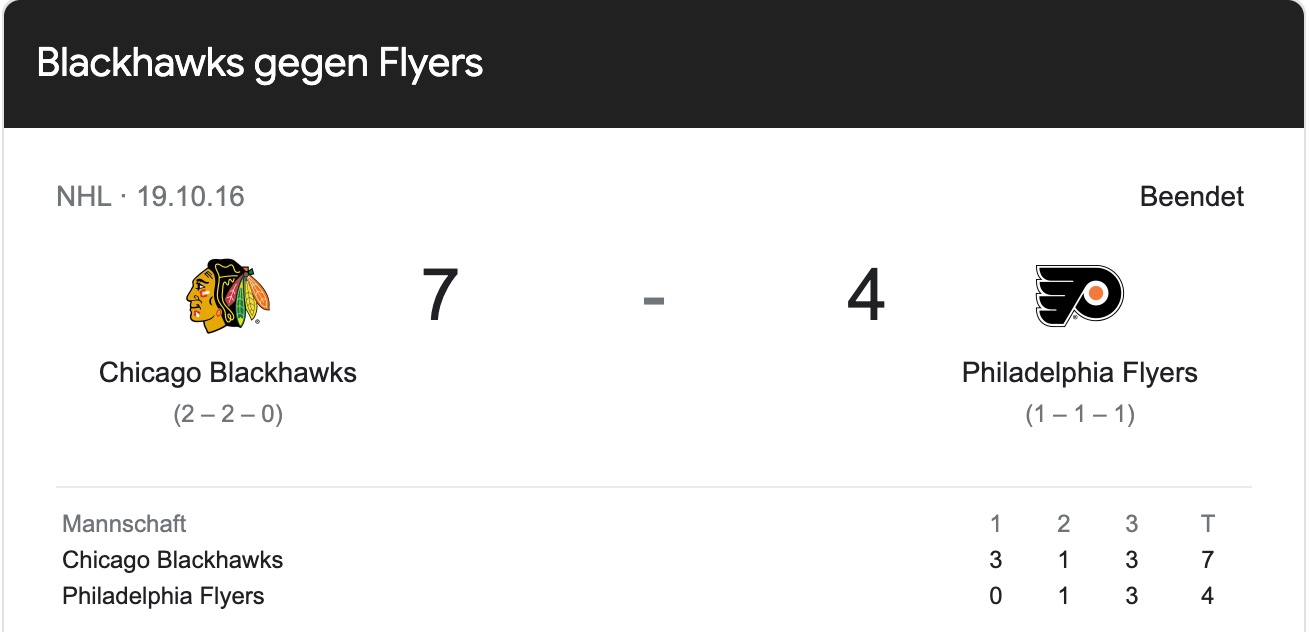

In [20]:
Image(filename='data/images/game_2016020045.jpg', width=600)

---
Let's have a closer look in 3_nhl_explore_one_game.ipynb